## Loading Data

In [30]:


import pandas as pd
import numpy as np

df = pd.read_csv("data/Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Exploring Data

<Axes: ylabel='count'>

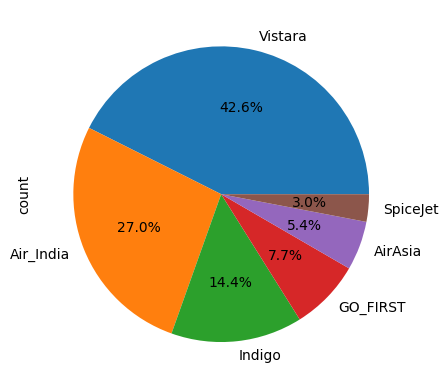

In [19]:
df.airline.value_counts().plot(kind="pie", autopct="%1.1f%%")

In [20]:
df.source_city.value_counts()


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [21]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [6]:
df['duration'].min()

np.float64(0.83)

In [7]:
df["duration"].max()

np.float64(49.83)

In [11]:
df["duration"].median()

np.float64(11.25)

## Preprocessing

We're going to want to drop features that are NULL and those that we think is irrelevant

For this project, the "flight" identifier column is deemed irrelevant


In [31]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

# Convert class to binary
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)


In [74]:
df.stops = pd.factorize(df.stops)[0]

In [75]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [32]:
df = df.join(pd.get_dummies(df.airline, prefix="airline").astype(int)).drop(
    "airline", axis=1
)
df = df.join(pd.get_dummies(df.source_city, prefix="source").astype(int)).drop(
    "source_city", axis=1
)
df = df.join(
    pd.get_dummies(df.destination_city, prefix="destination").astype(int)
).drop("destination_city", axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix="arrival").astype(int)).drop(
    "arrival_time", axis=1
)
df = df.join(pd.get_dummies(df.departure_time, prefix="departure").astype(int)).drop(
    "departure_time", axis=1
)

In [1]:
df


NameError: name 'df' is not defined

## Training Regression Model

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('price', axis=1), df['price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
reg.score(X_test, y_test)

0.984919940343326

In [57]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {math.sqrt(mean_squared_error(y_test, y_pred))}")

import pickle
pickle.dump(reg, open("model.pkl", "wb"))


R2 Score: 0.984919940343326
Mean Absolute Error: 1077.61092585048
Mean Squared Error: 7773503.437376588
Root Mean Squared Error: 2788.1003277099962


Text(0.5, 1.0, 'Actual vs Predicted Prices')

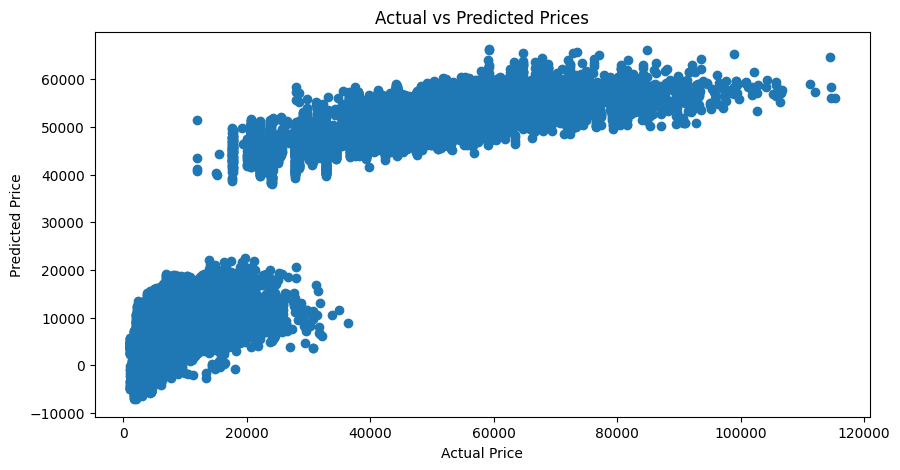

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")

In [43]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [44]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key= lambda x: x[1], reverse=True)

sorted_importances

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [27]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 5 artists>

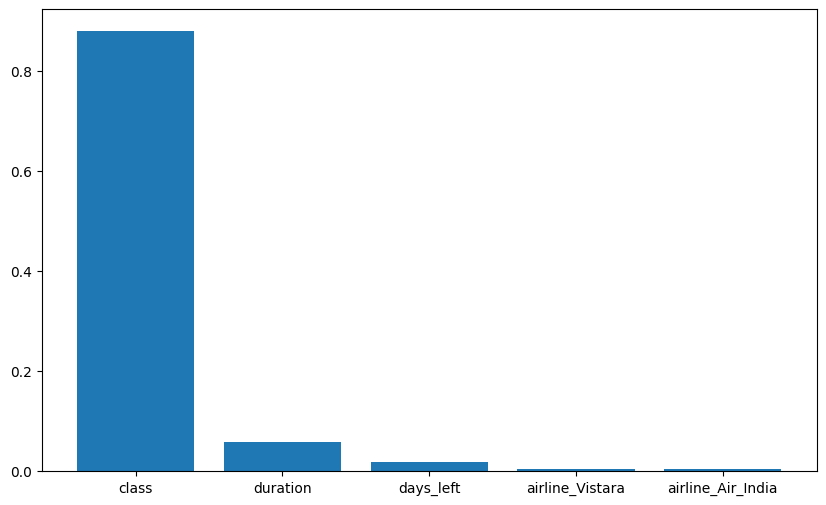

In [28]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

## Hyper Parameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


reg = xgb.XGBRegressor(
    tree_method="hist", device="cuda", n_estimators=100, use_label_encoder=False
)

# This will attempt a combination of all following parameters for the RandomForestRegressor model
# 324 Combinations total 
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 6, 10, 15],  
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
}

grid_search = GridSearchCV(
    estimator=reg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Randomized grid search by providing ranges
# We perform 2 iterations
param_dist = {
    "n_estimators": randint(100, 300),
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 5),
    "max_features": [1.0, "sqrt", "log2", None],
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=reg,
    param_distributions=param_dist,
    n_iter=2,
    cv=3,
    scoring="neg_mean_squared_error", 
    verbose=2,
    random_state=10,
    n_jobs=-1,
)

random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_

NameError: name 'RandomForestRegressor' is not defined

In [42]:
best_regressor.score(X_test, y_test)

0.9861642741313351

In [43]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {math.sqrt(mean_squared_error(y_test, y_pred))}")

R2 Score: 0.9861642741313351
Mean Absolute Error: 1083.3607549837538
Mean Squared Error: 7150932.881504889
Root Mean Squared Error: 2674.122824685674


Text(0.5, 1.0, 'Actual vs Predicted Prices')

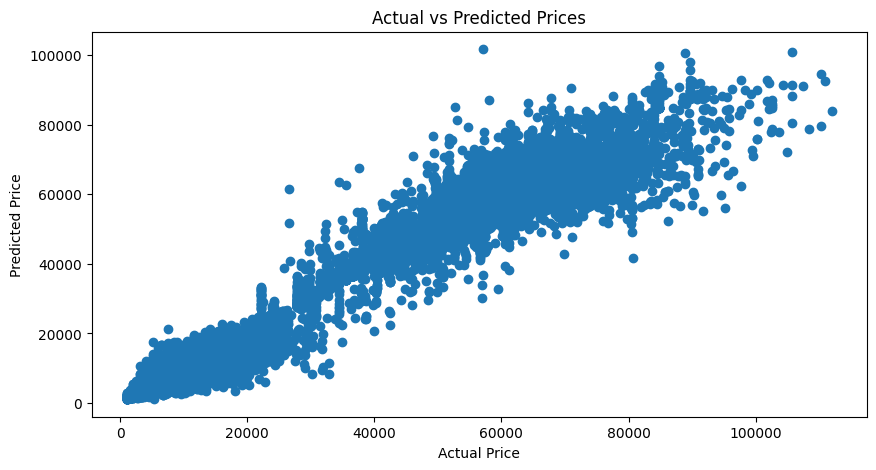

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")

## Conclusion

In [ ]:
best_regressor.predict()

Regular RandomForestRegressor achieved an accuracy of 98.54%
Hyper Tuned RandomForestRegressor achieved an accuracy of 98.61%

The most important features to consider when purchasing a flight:

1. ('class', 0.8806480796823627)
2. ('duration', 0.05706863815196575)
3. ('days_left', 0.01854988218795672)